In [1]:
import json
import re
from konlpy.tag import Okt
from collections import Counter
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager,rc
from wordcloud import WordCloud

In [2]:
inputFileName='카카오_뉴스(utf변환)'
data=json.loads(open(inputFileName+'.json','r',encoding='utf-8').read())
data

[{'Column1': 0,
  '제목': '\n이쯤되면 살만하지 않아?…카카오를 보는 시선이 달라지고 있다\n',
  '링크': 'https://finance.naver.com//item/news_read.naver?article_id=0005058185&office_id=009&code=035720&page=1&sm=title_entity_id.basic',
  '정보제공': '매일경제',
  '날짜': ' 2022.12.10 07:01'},
 {'Column1': 1,
  '제목': '\n"네이버·카카오 금융복합기업집단 지정해 리스크 대비해야"\n',
  '링크': 'https://finance.naver.com//item/news_read.naver?article_id=0005189900&office_id=277&code=035720&page=1&sm=title_entity_id.basic',
  '정보제공': '아시아경제',
  '날짜': ' 2022.12.09 16:52'},
 {'Column1': 2,
  '제목': '\n신한카드, 공인전자문서 중계 서비스 9부 능선…카카오·KT 등과 경쟁\n',
  '링크': 'https://finance.naver.com//item/news_read.naver?article_id=0005384254&office_id=018&code=035720&page=1&sm=title_entity_id.basic',
  '정보제공': '이데일리',
  '날짜': ' 2022.12.09 16:19'},
 {'Column1': 3,
  '제목': '\n네이버·카카오, 간밤 나스닥 반등에 동반 ↑\n',
  '링크': 'https://finance.naver.com//item/news_read.naver?article_id=0004785399&office_id=015&code=035720&page=1&sm=title_entity_id.basic',
  '정보제공': '한국경제',
  '날짜': ' 2022.12.09 09:39'

In [3]:
title=''
for item in data:
    if '제목' in item.keys():
        title=title+re.sub(r'[^\w]',' ',item['제목'])+''
title

' 이쯤되면 살만하지 않아  카카오를 보는 시선이 달라지고 있다   네이버 카카오 금융복합기업집단 지정해 리스크 대비해야   신한카드  공인전자문서 중계 서비스 9부 능선 카카오 KT 등과 경쟁  네이버 카카오  간밤 나스닥 반등에 동반    코스피  美 증시 훈풍에 상승 네이버 카카오 3 대 강세  개장시황    카카오 블랙아웃 방지법  국회 통과   플랫폼도 국가재난계획에 포함   카카오 블랙아웃 방지법  국회 통과  카카오 두나무 위메이드  인연과 악연 사이   뼈 아팠던 서비스 장애  카카오  시스템 영역별 다중화 이어간다  카카오   모두를 위한 AI  도전 이어간다  커리어데이  카카오 구글 출신 황성현 경영고문 영입   샤넬 향수 사면 뷰티 클래스 초대장  카카오   기프트엑스  출시   카톡에서 선물하면 샤넬 뷰티 클래스에 초대    카카오  기프트엑스     카카오   시스템 다중화 로 먹통 막는다  카카오의 고백  끊긴 다리와 같았다   카카오의 뼈아픈 고백  완성되지 않은 다리로 섬 이었다   카카오  시스템 전체 다중화로 먹통 방지  서비스 안정화가 최우선    반성의 장 된 카카오 개발자 콘퍼런스  먹통 재발방지안 공개   시스템 다중화 비상대응 체계 구축  먹통 재발 방지대책 내놓은 카카     카카오가 직접 다 밝혔다  카카오 대란의 원인은    중국이 퍼간 국내 웹툰 웹소설  카카오엔터가 104만건 잡아냈다  카카오엔터  8개월간 불법 웹툰 웹소설 688만건 차단   영상  카카오  먹통사태 이중화 미흡 때문    재발방지책 발표   본질 놓쳤다  반성문 쓴 카카오  5년간 투자 3배 확대 종합   서울산업진흥원  네이버 카카오에서 中企 온라인 판로 개척   두 번 실수 없다  카카오  대표 직속 IT 인프라 컨트롤타워 만든다  카카오  서비스 안정화 투자 3배 늘린다   전담 조직 CEO 직속으로   카카오 사태 사회적 책임   소명 다할 것    영상 카카오  오늘  먹통 사태  구체적 원인 재발방지책 발표  카카오모빌리티  시

In [4]:
nlp=Okt()
title_N=nlp.nouns(title)
title_N

['이쯤',
 '살',
 '만하',
 '카카오',
 '시선',
 '네이버',
 '카카오',
 '금융',
 '복합',
 '기업',
 '집단',
 '지정',
 '리스크',
 '대비',
 '신한카드',
 '공인',
 '전자문서',
 '중계',
 '서비스',
 '부',
 '능선',
 '카카오',
 '등',
 '경쟁',
 '네이버',
 '카카오',
 '간밤',
 '나스닥',
 '반등',
 '동반',
 '코스피',
 '증시',
 '훈풍',
 '상승',
 '네이버',
 '카카오',
 '강세',
 '개장',
 '황',
 '카카오',
 '블랙아웃',
 '방지법',
 '국회',
 '통과',
 '플랫폼',
 '국가',
 '재난',
 '계획',
 '포함',
 '카카오',
 '블랙아웃',
 '방지법',
 '국회',
 '통과',
 '카카오',
 '나무',
 '위메이드',
 '인연',
 '악연',
 '사이',
 '뼈',
 '서비스',
 '장애',
 '카카오',
 '시스템',
 '영역',
 '별',
 '다중화',
 '간다',
 '카카오',
 '모두',
 '위',
 '도전',
 '간다',
 '커리어',
 '데이',
 '카카오',
 '구글',
 '출신',
 '황성현',
 '경영',
 '고문',
 '입',
 '샤넬',
 '향수',
 '사면',
 '뷰티',
 '클래스',
 '초대장',
 '카카오',
 '기프트',
 '엑스',
 '출시',
 '카톡',
 '선물',
 '샤넬',
 '뷰티',
 '클래스',
 '초대',
 '카카오',
 '기프트',
 '엑스',
 '카카오',
 '시스템',
 '다중화',
 '로',
 '먹통',
 '카카오',
 '고백',
 '다리',
 '카카오',
 '뼈',
 '고백',
 '완성',
 '다리',
 '섬',
 '카카오',
 '시스템',
 '전체',
 '다중화',
 '먹통',
 '방지',
 '서비스',
 '안정화',
 '최',
 '우선',
 '반성',
 '장',
 '카카오',
 '개발자',
 '콘퍼런스',
 '먹통',
 '재발',
 '방지',
 '안',
 '공개',
 '시스템

In [5]:
count=Counter(title_N)
count

Counter({'이쯤': 1,
         '살': 16,
         '만하': 1,
         '카카오': 5312,
         '시선': 2,
         '네이버': 732,
         '금융': 76,
         '복합': 6,
         '기업': 82,
         '집단': 4,
         '지정': 9,
         '리스크': 29,
         '대비': 14,
         '신한카드': 1,
         '공인': 49,
         '전자문서': 1,
         '중계': 1,
         '서비스': 141,
         '부': 8,
         '능선': 1,
         '등': 92,
         '경쟁': 20,
         '간밤': 2,
         '나스닥': 76,
         '반등': 75,
         '동반': 73,
         '코스피': 125,
         '증시': 48,
         '훈풍': 29,
         '상승': 70,
         '강세': 74,
         '개장': 49,
         '황': 60,
         '블랙아웃': 28,
         '방지법': 8,
         '국회': 7,
         '통과': 8,
         '플랫폼': 158,
         '국가': 8,
         '재난': 11,
         '계획': 9,
         '포함': 6,
         '나무': 17,
         '위메이드': 6,
         '인연': 1,
         '악연': 1,
         '사이': 2,
         '뼈': 2,
         '장애': 33,
         '시스템': 33,
         '영역': 7,
         '별': 6,
         '다중화': 5,
 

In [6]:
word_count=dict()
for tag,counts in count.most_common(80):
    if(len(str(tag))>1):
        word_count[tag]=counts
        print("%s : %d"%(tag,counts))

카카오 : 5312
네이버 : 732
모빌리티 : 541
먹통 : 280
주가 : 259
특징 : 222
대표 : 190
목표 : 190
매각 : 189
투자 : 187
성장 : 171
남궁훈 : 159
플랫폼 : 158
신저 : 145
김범수 : 144
서비스 : 141
센터 : 136
실적 : 136
하락 : 132
영업 : 127
코스피 : 125
피해 : 125
사태 : 120
택시 : 120
보상 : 120
단독 : 118
매출 : 114
시장 : 111
개미 : 107
상생 : 105
사업 : 102
급락 : 100
버스 : 99
메타 : 97
데이터 : 90
글로벌 : 90
상장 : 90
화재 : 89
노조 : 89
증권 : 88
인수 : 85
열사 : 84
엔터프라이즈 : 84
기업 : 82
웹툰 : 82
주주 : 82
삼성 : 80
검토 : 79
금융 : 76
나스닥 : 76
반등 : 75
광고 : 75
강세 : 74
동반 : 73
디지털 : 73
공정위 : 73
카톡 : 72
규제 : 72
거래 : 72
주식 : 71
올해 : 71
상승 : 70
보험 : 70
회복 : 68
속보 : 67
기술 : 66


In [7]:
font_path="C:/Windows/fonts/malgun.ttf"
font_name=font_manager.FontProperties(fname=font_path).get_name()
matplotlib.rc('font',family=font_name)

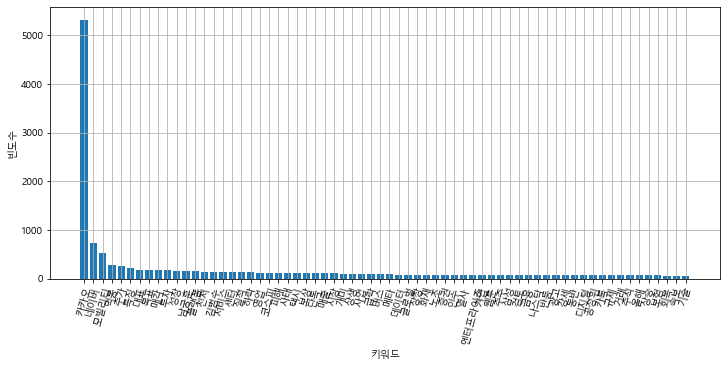

In [8]:
plt.figure(figsize=(12,5))
plt.xlabel('키워드')
plt.ylabel('빈도수')
plt.grid(True)
sorted_Keys=sorted(word_count,key=word_count.get,reverse=True)
sorted_Values=sorted(word_count.values(),reverse=True)
plt.bar(range(len(word_count)),sorted_Values,align='center')
plt.xticks(range(len(word_count)),list(sorted_Keys),rotation='75')
plt.show()

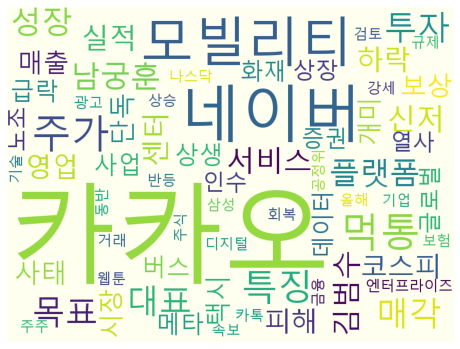

In [9]:
wc=WordCloud(font_path,background_color='ivory',width=800,height=600)
cloud=wc.generate_from_frequencies(word_count)
plt.figure(figsize=(8,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [10]:
cloud.to_file(inputFileName+'_키워드_빈도수_시각화.jpg')